In [1]:
import numpy as np
import pandas as pd
import sklearn
import torch
import torch.nn as nn
import torch.nn.parallel
import torch.optim as optim
import torch.nn.functional as F
from torch.autograd import Variable
import math
import matplotlib.pyplot as plt
import tqdm as notebook_tqdm

length of x: torch.Size([400, 1])
length of y: torch.Size([400, 1])


Text(0, 0.5, 'Dependent Variable')

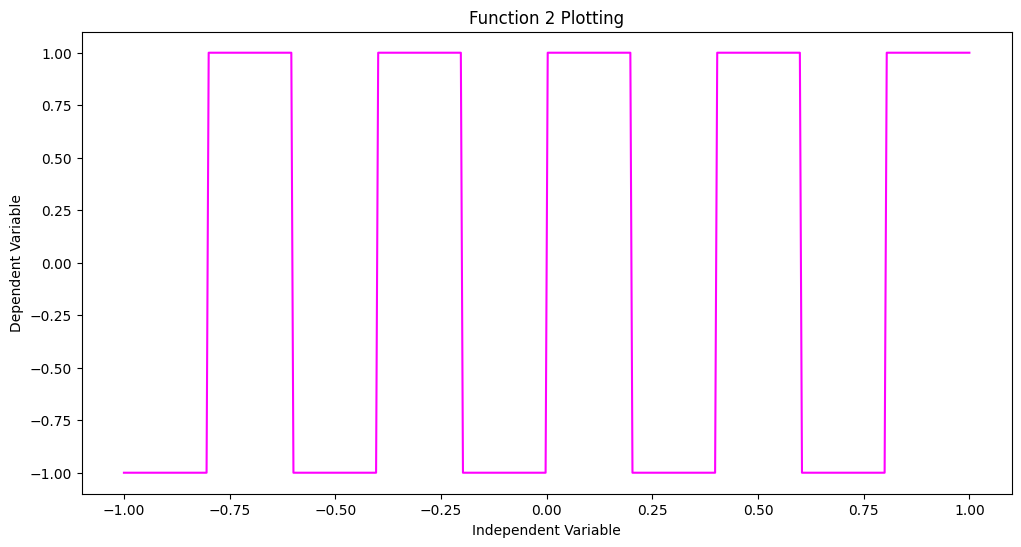

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 400), dim=1)

y = (np.sign(np.sin(5*np.pi*x)))

print('length of x:',x.shape)
print('length of y:',y.shape)
plt.figure(figsize=(12,6))
plt.plot(x, y, color = "magenta")
plt.title('Function 2 Plotting')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')

In [21]:
#model 1
class Model1(nn.Module):
    def __init__(self,):
        super().__init__()
       
        self.hiddenlayer1 = nn.Linear(1, 5)   
        self.hiddenlayer2 = nn.Linear(5, 10)
        self.hiddenlayer3 = nn.Linear(10, 10)
        self.hiddenlayer4 = nn.Linear(10, 10)
        self.hiddenlayer5 = nn.Linear(10, 10)
        self.hiddenlayer6 = nn.Linear(10, 10)
        self.hiddenlayer7 = nn.Linear(10, 5)
        
        self.output = nn.Linear(5, 1)   

     
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = F.relu(self.hiddenlayer5(x))
        x = F.relu(self.hiddenlayer6(x))
        x = F.relu(self.hiddenlayer7(x))
        x = self.output(x)            
        return x     
        


model1 = Model1()

optimizer = torch.optim.Adam(model1.parameters(), lr=0.001, weight_decay = 0.0001)


loss_function = torch.nn.MSELoss()  

summation=[]

for j in model1.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 1:', np.sum(summation),)

#Getting weights & bias
print("Model 1: weight and bias before training\n")

for param in model1.state_dict():
    print(param, "\t",model1.state_dict()[param])

Number of parameters in Model 1: 571
Model 1: weight and bias before training

hiddenlayer1.weight 	 tensor([[-0.4176],
        [-0.1566],
        [ 0.2482],
        [ 0.1490],
        [ 0.5921]])
hiddenlayer1.bias 	 tensor([ 0.3362,  0.4869, -0.4747,  0.9834,  0.4524])
hiddenlayer2.weight 	 tensor([[ 0.2086, -0.3771,  0.4270, -0.0164, -0.1581],
        [ 0.4332, -0.3056, -0.1900,  0.2777, -0.2993],
        [ 0.4381, -0.1810,  0.1413,  0.3290, -0.2627],
        [-0.1366,  0.2515,  0.0114,  0.1323,  0.4255],
        [-0.1407, -0.3474, -0.2634,  0.3891,  0.4048],
        [-0.3962, -0.2263,  0.0476, -0.0581,  0.2253],
        [-0.3602, -0.3920, -0.0238, -0.3882,  0.3584],
        [-0.2706,  0.4256,  0.2923,  0.2584,  0.1633],
        [ 0.1811,  0.2546,  0.2456, -0.3299,  0.3813],
        [-0.2786,  0.2478,  0.2413,  0.2686,  0.2163]])
hiddenlayer2.bias 	 tensor([ 0.1492,  0.1401,  0.2288,  0.0133,  0.4266, -0.2941,  0.0480, -0.2341,
         0.4383,  0.4225])
hiddenlayer3.weight 	 tensor(

In [22]:
def testing(model,x,y):
    max_epoch = 25000
    epoch_array = []
    loss_array=[]
    epoch = 0
    not_converged = True
    while not_converged:
        
       
        prediction = model(x)     
        loss = loss_function(prediction, y)
        
        optimizer.zero_grad()
    
        loss.backward()         
        optimizer.step() 
        epoch_array.append(epoch)
        loss_array.append(loss.detach().numpy())
        epoch = epoch + 1
        
        if epoch % 100 == 0 : print(f'epoch: {epoch}, loss = {loss.item():.4f}')
                
        if epoch == max_epoch:
                print("Reached to Maximum Epoch")
                not_converged = False
        elif (epoch > 5) and  (loss_array[-1] < 0.001):
            if abs(loss_array[-3] - loss_array[-2]) < 1.0e-05 and abs(loss_array[-2] - loss_array[-1]) < 0.0001:
                print("Converged:",loss_array[-1])
                not_converged = False
                
    return epoch_array,loss_array,prediction

In [23]:
x = x.clone().detach()
y = y.clone().detach()

In [24]:
Model1epoch_array,Model1loss_array,Model1prediction = testing(model1,x,y)

epoch: 100, loss = 0.9793
epoch: 200, loss = 0.9675
epoch: 300, loss = 0.9523
epoch: 400, loss = 0.8292
epoch: 500, loss = 0.7938
epoch: 600, loss = 0.7080
epoch: 700, loss = 0.6430
epoch: 800, loss = 0.6114
epoch: 900, loss = 0.5997
epoch: 1000, loss = 0.5917
epoch: 1100, loss = 0.5872
epoch: 1200, loss = 0.5894
epoch: 1300, loss = 0.5808
epoch: 1400, loss = 0.5776
epoch: 1500, loss = 0.6084
epoch: 1600, loss = 0.5936
epoch: 1700, loss = 0.5762
epoch: 1800, loss = 0.5737
epoch: 1900, loss = 0.5722
epoch: 2000, loss = 0.5710
epoch: 2100, loss = 0.5709
epoch: 2200, loss = 0.5703
epoch: 2300, loss = 0.5707
epoch: 2400, loss = 0.5732
epoch: 2500, loss = 0.5681
epoch: 2600, loss = 0.5720
epoch: 2700, loss = 0.5714
epoch: 2800, loss = 0.5738
epoch: 2900, loss = 0.5693
epoch: 3000, loss = 0.5799
epoch: 3100, loss = 0.5688
epoch: 3200, loss = 0.5669
epoch: 3300, loss = 0.5732
epoch: 3400, loss = 0.5658
epoch: 3500, loss = 0.5651
epoch: 3600, loss = 0.5655
epoch: 3700, loss = 0.5643
epoch: 380

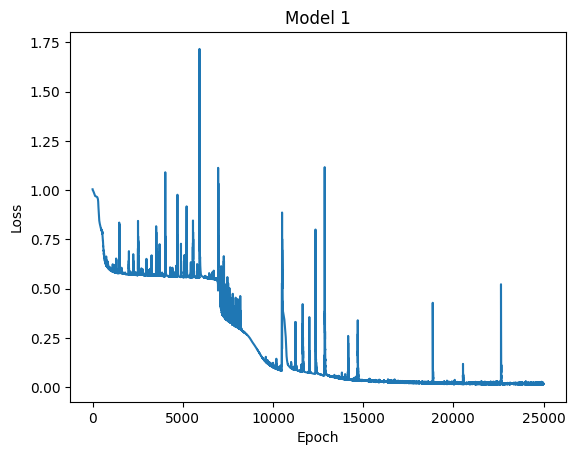

In [25]:
plt.plot(Model1epoch_array, Model1loss_array)
plt.title('Model 1')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

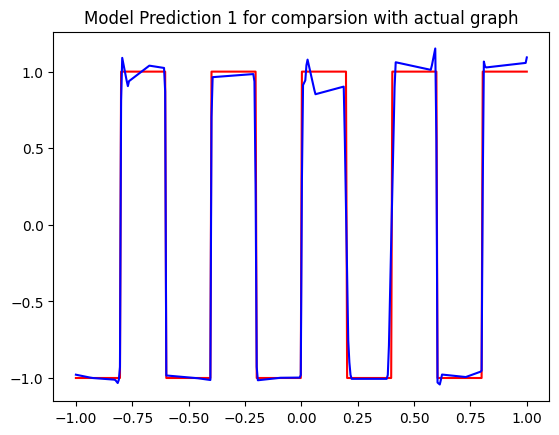

In [26]:
plt.plot(x.numpy(),y.numpy(),color="red")

plt.plot(x,Model1prediction.data.numpy(),color="blue")
plt.title('Model Prediction 1 for comparsion with actual graph')
plt.show()

In [31]:
#model 2
class Model2(nn.Module):
    def __init__(self,):
        super().__init__()
       
        self.hiddenlayer1 = nn.Linear(1, 10)   
        self.hiddenlayer2 = nn.Linear(10, 18)
        self.hiddenlayer3 = nn.Linear(18, 15)
        self.hiddenlayer4 = nn.Linear(15, 4)
        # output layer
        self.output = nn.Linear(4, 1)   

     
    def forward(self, x):
        x = F.relu(self.hiddenlayer1(x))      
        x = F.relu(self.hiddenlayer2(x))
        x = F.relu(self.hiddenlayer3(x))
        x = F.relu(self.hiddenlayer4(x))
        x = self.output(x)            
        return x     
        


model2 = Model2()

optimizer = torch.optim.Adam(model2.parameters(), lr=0.005, weight_decay = 0.0001)


loss_function = torch.nn.MSELoss()  

summation=[]

for j in model2.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 2:', np.sum(summation),)


print("Model 2: weight and bias before training")

for param in model2.state_dict():
    print(param, "\t",model2.state_dict()[param])

Number of parameters in Model 2: 572
Model 2: weight and bias before training
hiddenlayer1.weight 	 tensor([[ 0.4132],
        [ 0.7812],
        [-0.3982],
        [-0.5058],
        [-0.2775],
        [ 0.6422],
        [ 0.2765],
        [ 0.6108],
        [-0.9243],
        [ 0.7763]])
hiddenlayer1.bias 	 tensor([-0.1600,  0.1858, -0.7159,  0.1625,  0.1403,  0.6707, -0.6941,  0.6408,
        -0.7676, -0.3697])
hiddenlayer2.weight 	 tensor([[-0.2007,  0.2479,  0.0985, -0.2701, -0.2553, -0.0715, -0.2651, -0.1088,
          0.0592, -0.3054],
        [-0.3067,  0.0430, -0.2205,  0.0884, -0.3129,  0.1374,  0.2551, -0.2551,
          0.1030,  0.2721],
        [-0.1293,  0.2410, -0.2044,  0.1117,  0.1909, -0.0893,  0.1438,  0.2782,
         -0.2815, -0.2307],
        [-0.0231,  0.1819, -0.3038, -0.0519,  0.2790,  0.1173,  0.0258, -0.2404,
         -0.0060,  0.1547],
        [-0.1391, -0.2362,  0.0348, -0.2226, -0.0700, -0.0388,  0.2898,  0.0299,
         -0.0399,  0.0578],
        [ 0.083

In [32]:
Model2epoch_array,Model2loss_array,Model2prediction = testing(model2,x,y)

epoch: 100, loss = 0.9131
epoch: 200, loss = 0.3270
epoch: 300, loss = 0.1535
epoch: 400, loss = 0.0991
epoch: 500, loss = 0.0735
epoch: 600, loss = 0.0557
epoch: 700, loss = 0.0741
epoch: 800, loss = 0.0457
epoch: 900, loss = 0.0344
epoch: 1000, loss = 0.0316
epoch: 1100, loss = 0.0284
epoch: 1200, loss = 0.0303
epoch: 1300, loss = 0.0268
epoch: 1400, loss = 0.0249
epoch: 1500, loss = 0.0361
epoch: 1600, loss = 0.0275
epoch: 1700, loss = 0.0485
epoch: 1800, loss = 0.0207
epoch: 1900, loss = 0.0195
epoch: 2000, loss = 0.0440
epoch: 2100, loss = 0.0149
epoch: 2200, loss = 0.0146
epoch: 2300, loss = 0.0162
epoch: 2400, loss = 0.0148
epoch: 2500, loss = 0.0129
epoch: 2600, loss = 0.0308
epoch: 2700, loss = 0.0174
epoch: 2800, loss = 0.0907
epoch: 2900, loss = 0.0136
epoch: 3000, loss = 0.0127
epoch: 3100, loss = 0.0187
epoch: 3200, loss = 0.0140
epoch: 3300, loss = 0.0642
epoch: 3400, loss = 0.0149
epoch: 3500, loss = 0.0134
epoch: 3600, loss = 0.0391
epoch: 3700, loss = 0.0127
epoch: 380

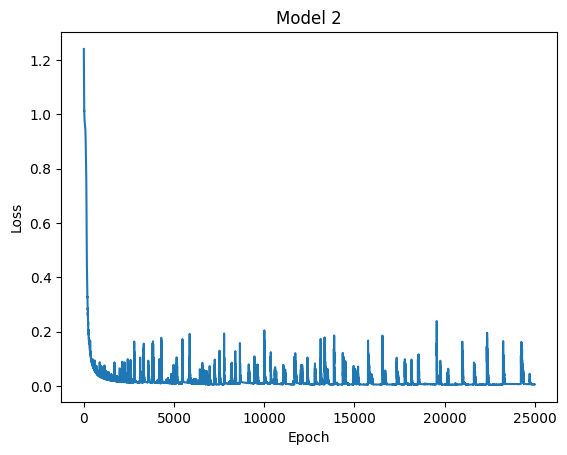

In [33]:
plt.plot(Model2epoch_array, Model2loss_array)
plt.title('Model 2')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

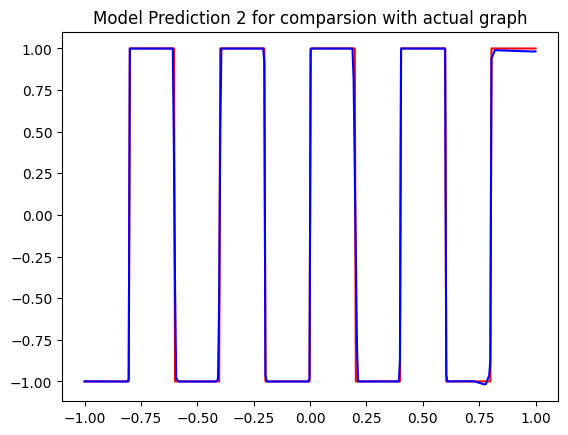

In [34]:
plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,Model2prediction.data.numpy(),color="blue")
plt.title('Model Prediction 2 for comparsion with actual graph')
plt.show()

In [41]:
class Model3(nn.Module):
    def __init__(self,):
        super().__init__()
        # hidden layers
        self.hiddenlayer = nn.Linear(1, 190)   

        # output layer
        self.output = nn.Linear(190, 1)   

        # activation functions for hidden layers
    def forward(self, x):
        x = F.relu(self.hiddenlayer(x))      
        x = self.output(x)            
        return x     
        

#defining the model
model3 = Model3()

optimizer = torch.optim.Adam(model3.parameters(), lr=0.001, weight_decay = 0.00011) 

#finding Mean Squared Error Loss
loss_function = torch.nn.MSELoss()  

summation=[]

for j in model3.parameters():
    summation.append(torch.numel(j))
    
print('Number of parameters in Model 3:', np.sum(summation),)

#Getting weights & bias
print("Model 3: weight and bias before training")

for param in model3.state_dict():
    print(param, "\t",model3.state_dict()[param])

Number of parameters in Model 3: 571
Model 3: weight and bias before training
hiddenlayer.weight 	 tensor([[-0.2012],
        [-0.3284],
        [ 0.0408],
        [ 0.8038],
        [ 0.2370],
        [ 0.9397],
        [ 0.1529],
        [-0.8694],
        [ 0.1265],
        [-0.6287],
        [ 0.3265],
        [ 0.6970],
        [ 0.8036],
        [ 0.8224],
        [-0.5421],
        [-0.1661],
        [ 0.3693],
        [-0.6015],
        [-0.7191],
        [ 0.6509],
        [ 0.3367],
        [-0.1232],
        [-0.5899],
        [-0.4560],
        [-0.7648],
        [ 0.1143],
        [ 0.5739],
        [ 0.2781],
        [ 0.5985],
        [-0.7431],
        [ 0.6672],
        [-0.1160],
        [ 0.7978],
        [-0.3293],
        [-0.0087],
        [-0.6333],
        [ 0.5459],
        [-0.3452],
        [-0.4143],
        [ 0.7246],
        [ 0.5236],
        [-0.1765],
        [ 0.8989],
        [-0.9339],
        [-0.2781],
        [-0.4230],
        [ 0.8076],
        

In [42]:
Model3epoch_array,Model3loss_array,Model3prediction = testing(model3,x,y)

epoch: 100, loss = 0.9249
epoch: 200, loss = 0.8888
epoch: 300, loss = 0.8616
epoch: 400, loss = 0.8371
epoch: 500, loss = 0.8142
epoch: 600, loss = 0.7912
epoch: 700, loss = 0.7674
epoch: 800, loss = 0.7422
epoch: 900, loss = 0.7141
epoch: 1000, loss = 0.6817
epoch: 1100, loss = 0.6446
epoch: 1200, loss = 0.6036
epoch: 1300, loss = 0.5602
epoch: 1400, loss = 0.5165
epoch: 1500, loss = 0.4744
epoch: 1600, loss = 0.4352
epoch: 1700, loss = 0.3995
epoch: 1800, loss = 0.3683
epoch: 1900, loss = 0.3416
epoch: 2000, loss = 0.3195
epoch: 2100, loss = 0.3012
epoch: 2200, loss = 0.2860
epoch: 2300, loss = 0.2730
epoch: 2400, loss = 0.2618
epoch: 2500, loss = 0.2520
epoch: 2600, loss = 0.2436
epoch: 2700, loss = 0.2360
epoch: 2800, loss = 0.2292
epoch: 2900, loss = 0.2229
epoch: 3000, loss = 0.2173
epoch: 3100, loss = 0.2120
epoch: 3200, loss = 0.2072
epoch: 3300, loss = 0.2028
epoch: 3400, loss = 0.1986
epoch: 3500, loss = 0.1945
epoch: 3600, loss = 0.1910
epoch: 3700, loss = 0.1875
epoch: 380

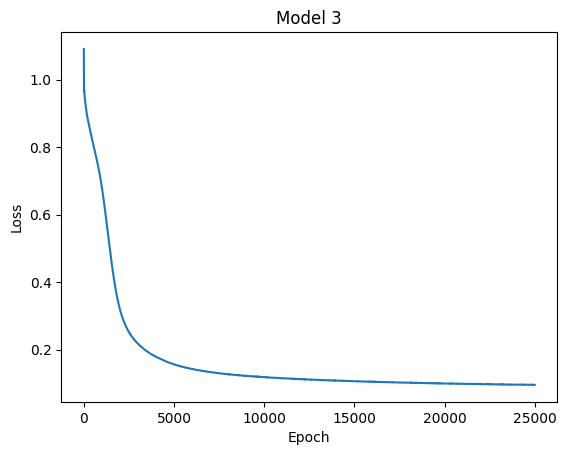

In [43]:
plt.plot(Model3epoch_array, Model3loss_array)
plt.title('Model 3')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()


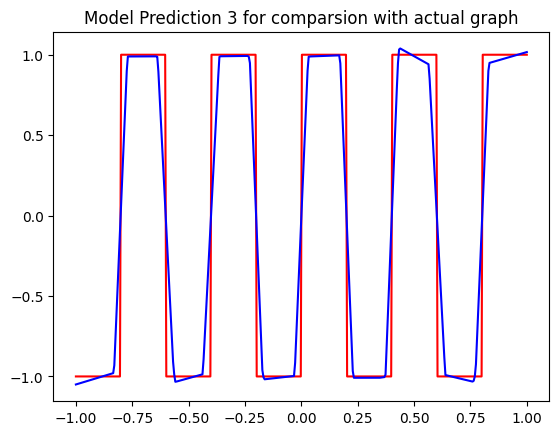

In [44]:

plt.plot(x.numpy(),y.numpy(),color="red")
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Model Prediction 3 for comparsion with actual graph')
plt.show()

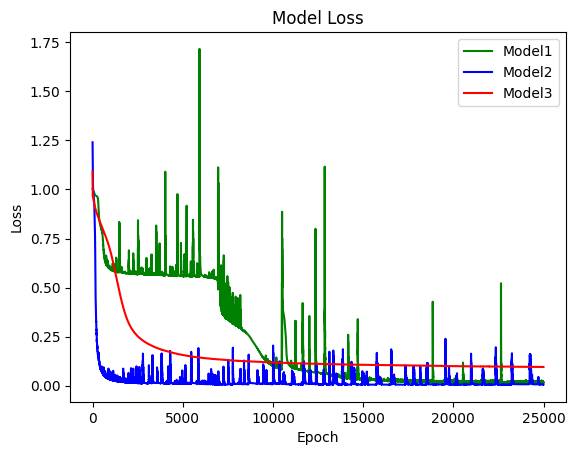

In [45]:
plt.plot(Model1epoch_array,Model1loss_array, color = "green")
plt.plot(Model2epoch_array,Model2loss_array, color = "blue")
plt.plot(Model3epoch_array,Model3loss_array, color = "red")
plt.title('Model Loss')
plt.legend(['Model1', 'Model2','Model3'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.savefig('lossepoch_function2.png')
plt.show()

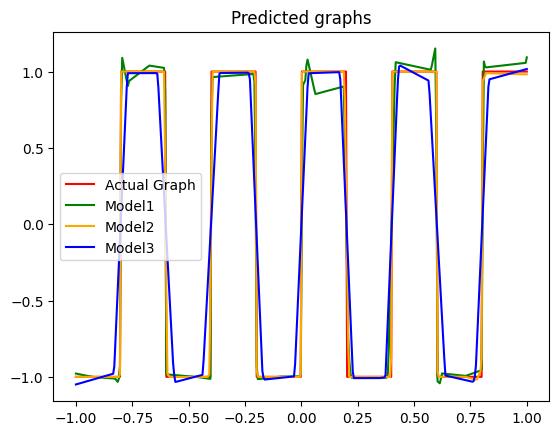

In [47]:
#Plotting the prediction

#ploting the actual graph of the function
plt.plot(x.numpy(),y.numpy(),color="red")
#ploting the prediction graphs
plt.plot(x,Model1prediction.data.numpy(),color="green")
plt.plot(x,Model2prediction.data.numpy(),color="orange")
plt.plot(x,Model3prediction.data.numpy(),color="blue")
plt.title('Predicted graphs')
plt.legend(['Actual Graph', 'Model1', 'Model2','Model3'])
plt.savefig('predicted_graphs2.png')
plt.show()